# IMPORT LIBRARIES

In [1]:
#Numerical Python
import numpy as np

#Data Manipulation
import pandas as pd

#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# LOAD DATASET

In [2]:
data=r"C:\Users\Priyanka Rath\Desktop\SPAM-MAIL-DETECTION\Data.csv"
df = pd.read_csv(data)
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
Category    5572 non-null object
Message     5572 non-null object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [5]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

Text(0.5, 1.0, 'Spam vs Ham Distribution')

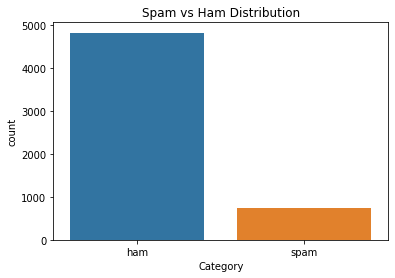

In [6]:
#Count of spam vs ham
df['Category'].value_counts()
sns.countplot(x='Category',data=df)
plt.title('Spam vs Ham Distribution')

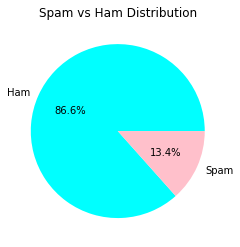

In [7]:
#Pie chart
df['Category'].value_counts().plot.pie(autopct='%1.1f%%',colors=['aqua','pink'],labels=['Ham','Spam'])
plt.title('Spam vs Ham Distribution')
plt.ylabel('')
plt.show()

# DATA PREPOCESSING

In [8]:
# Convert labels :spam = 1, ham = 0
df['Category']=df['Category'].map({'spam': 1,'ham': 0})
df.columns=['Category', 'Message']
df

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


# Feature Extraction with TF-IDF

In [10]:
# Import TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Converting the text to feature vectors
vect = TfidfVectorizer(stop_words='english', lowercase=True)
X = vect.fit_transform(df['Message'])

# Labels
y = df['Category']


In [12]:
#Train-Test-Split:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# MACHINE LEARNING MODELS

In [13]:
# Machine Learning
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

# LOGISTIC REGRESSION

In [14]:
# Model Training 
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)

In [15]:
#Evaluation Metrics
print("Accuracy:",accuracy_score(y_test,y_pred_lr))
print("Precision:",precision_score(y_test,y_pred_lr))
print("Recall:",recall_score(y_test,y_pred_lr))
print("F1 Score:",f1_score(y_test,y_pred_lr))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_lr))

Accuracy: 0.95695067264574
Precision: 1.0
Recall: 0.6778523489932886
F1 Score: 0.808
Confusion Matrix:
 [[966   0]
 [ 48 101]]


Text(33.0, 0.5, 'True Label')

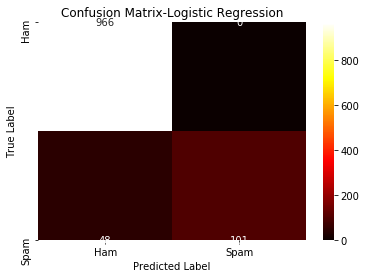

In [16]:
#Visualizations
sns.heatmap(confusion_matrix(y_test, y_pred_lr),annot=True,fmt='d',cmap='hot',
            xticklabels=['Ham', 'Spam'],
            yticklabels=['Ham', 'Spam'])
plt.title("Confusion Matrix-Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# K-Nearest Neighbors(KNN)

In [17]:
# Model Training
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)

In [18]:
#Evaluation Metrics
print("Accuracy:",accuracy_score(y_test,y_pred_knn))
print("Precision:",precision_score(y_test,y_pred_knn))
print("Recall:",recall_score(y_test,y_pred_knn))
print("F1 Score:",f1_score(y_test,y_pred_knn))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_knn))

Accuracy: 0.9103139013452914
Precision: 1.0
Recall: 0.3288590604026846
F1 Score: 0.494949494949495
Confusion Matrix:
 [[966   0]
 [100  49]]


Text(33.0, 0.5, 'True Label')

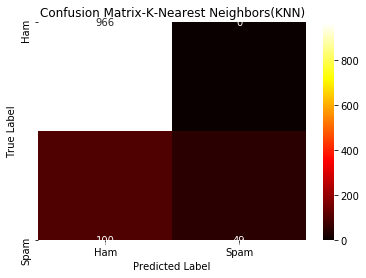

In [19]:
#Visualization
sns.heatmap(confusion_matrix(y_test, y_pred_knn),annot=True,fmt='d',cmap='hot',
            xticklabels=['Ham','Spam'],
            yticklabels=['Ham','Spam'])
plt.title("Confusion Matrix-K-Nearest Neighbors(KNN)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Decision Tree

In [20]:
# Model Training
dec_t=DecisionTreeClassifier()
dec_t.fit(X_train,y_train)
y_pred_dect=dec_t.predict(X_test)

In [21]:
#Evaluation Metrics
print("Accuracy:",accuracy_score(y_test,y_pred_dect))
print("Precision:",precision_score(y_test,y_pred_dect))
print("Recall:",recall_score(y_test,y_pred_dect))
print("F1 Score:",f1_score(y_test,y_pred_dect))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_dect))

Accuracy: 0.967713004484305
Precision: 0.9064748201438849
Recall: 0.8456375838926175
F1 Score: 0.875
Confusion Matrix:
 [[953  13]
 [ 23 126]]


Text(33.0, 0.5, 'True Label')

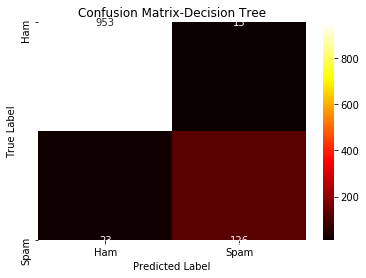

In [22]:
#Visualization
sns.heatmap(confusion_matrix(y_test, y_pred_dect),annot=True,fmt='d',cmap='hot',
            xticklabels=['Ham','Spam'],
            yticklabels=['Ham','Spam'])
plt.title("Confusion Matrix-Decision Tree")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Naive Bayes(Multinomial)

In [23]:
#Model Training
nb=MultinomialNB()
nb.fit(X_train,y_train)
y_pred_nb=nb.predict(X_test)

In [24]:
#Evaluation Matrics
print("Accuracy:",accuracy_score(y_test,y_pred_nb))
print("Precision:",precision_score(y_test,y_pred_nb))
print("Recall:",recall_score(y_test,y_pred_nb))
print("F1 Score:",f1_score(y_test,y_pred_nb))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_nb))

Accuracy: 0.9775784753363229
Precision: 1.0
Recall: 0.8322147651006712
F1 Score: 0.9084249084249084
Confusion Matrix:
 [[966   0]
 [ 25 124]]


Text(33.0, 0.5, 'True Label')

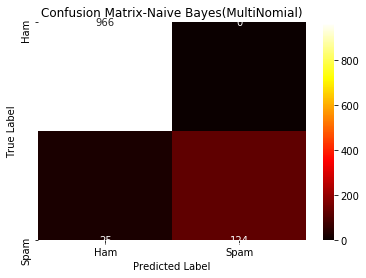

In [41]:
#Visualization
sns.heatmap(confusion_matrix(y_test, y_pred_nb),annot=True,fmt='d',cmap='hot',
            xticklabels=['Ham','Spam'],
            yticklabels=['Ham','Spam'])
plt.title("Confusion Matrix-Naive Bayes(MultiNomial)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Comparison Of all Models

In [26]:
final_comp = {
    'Logistic Regression': [
        accuracy_score(y_test,y_pred_lr),
        precision_score(y_test,y_pred_lr),
        recall_score(y_test,y_pred_lr),
        f1_score(y_test,y_pred_lr)
    ],
    'KNN': [
        accuracy_score(y_test,y_pred_knn),
        precision_score(y_test,y_pred_knn),
        recall_score(y_test,y_pred_knn),
        f1_score(y_test,y_pred_knn)
    ],
    'Decision Tree': [
        accuracy_score(y_test,y_pred_dect),
        precision_score(y_test,y_pred_dect),
        recall_score(y_test,y_pred_dect),
        f1_score(y_test,y_pred_dect)
    ],
    'Naive Bayes': [
        accuracy_score(y_test,y_pred_nb),
        precision_score(y_test,y_pred_nb),
        recall_score(y_test,y_pred_nb),
        f1_score(y_test,y_pred_nb)
    ]
}
comp_res=pd.DataFrame(final_comp,index=['Accuracy','Precision','Recall','F1 Score']).transpose()
comp_res.index.name='Model'
print("Evaluation Metrics for All Models:\n")
print(comp_res)


Evaluation Metrics for All Models:

                     Accuracy  Precision    Recall  F1 Score
Model                                                       
Logistic Regression  0.956951   1.000000  0.677852  0.808000
KNN                  0.910314   1.000000  0.328859  0.494949
Decision Tree        0.967713   0.906475  0.845638  0.875000
Naive Bayes          0.977578   1.000000  0.832215  0.908425


# Visualization of all Models

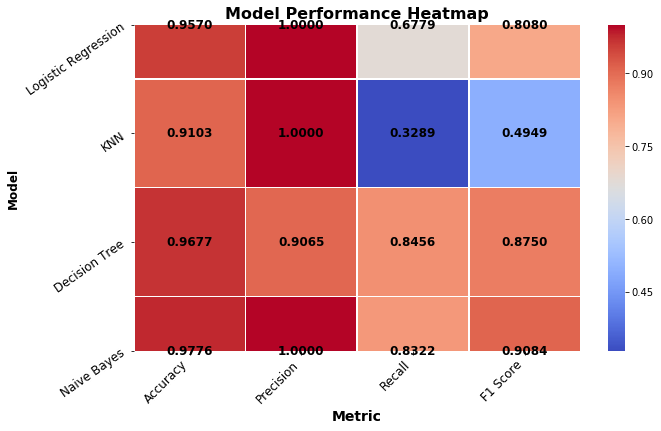

In [37]:
plt.figure(figsize=(10,6))  # increase figure size
sns.heatmap(
    comp_res,
    annot=True,
    fmt=".4f",
    cmap="coolwarm",
    linewidths=0.5,
    annot_kws={"size":12, "weight":"bold", "color":"black"}  # bigger, bold, black text
)

plt.title("Model Performance Heatmap", fontsize=16, weight='bold')
plt.xlabel("Metric", fontsize=14, weight='bold')
plt.ylabel("Model", fontsize=12, weight='bold')
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12 , rotation=35 ,ha='right' )
plt.show()

# Observation:

### Precision:

Logistic Regression, KNN, and Naive Bayes all achieved perfect precision (1.0000).
Decision Tree had slightly lower precision (0.9137), meaning it occasionally predicted spam where it wasn't.


### Recall (ability to catch actual spam):

KNN had very low recall (0.3289).
Logistic Regression had moderate recall (0.6779).
Decision Tree: 0.8523
Naive Bayes: 0.8322

### F1 Score (balance of precision and recall):

KNN: 0.4949 → weakest overall.
Logistic Regression: 0.8080
Decision Tree: 0.8819
Naive Bayes: 0.9084

### Accuracy:

Highest for Naive Bayes (0.9776), followed by Decision Tree (0.9695).

# Conclusion:

- Naive Bayes delivered the highest overall accuracy (0.9776) with perfect precision and strong recall (0.8322), making it the best-balanced model for spam detection in this case.

- Decision Tree also performed strongly, especially in recall (0.8523) and F1 score (0.8819), but had slightly lower precision (0.9137).

- Logistic Regression was very precise (1.0000) but missed more spam (recall: 0.6779), resulting in a lower F1 score (0.8080).

- KNN, while precise, had poor recall and F1 score, making it unsuitable for effective spam filtering.

#### Overll, Naive Bayes is the most reliable, accurate, and generalizable model for spam mail detection among the ones tested.

In [42]:
import pickle

# Save trained Naive Bayes model + TF-IDF vectorizer
pickle.dump(nb, open("model.pkl", "wb"))
pickle.dump(vect, open("vectorizer.pkl", "wb"))


In [43]:
# Load back the model and vectorizer
loaded_model = pickle.load(open("model.pkl", "rb"))
loaded_vect = pickle.load(open("vectorizer.pkl", "rb"))

print(type(loaded_model))
print(type(loaded_vect))


<class 'sklearn.naive_bayes.MultinomialNB'>
<class 'sklearn.feature_extraction.text.TfidfVectorizer'>
